In [1]:
# The main event
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# To process the data
import numpy as np
import pandas as pd

# To watch some animations
from IPython.display import Video

# Making animations with matplotlib

## Olivier Chabot

### LiPEC Presentation 05/08/2020

# Presentation Outline

1. Usual use of matplotlib 


2. From 2D plots to animations
    - An Introduction to `matplotlib.animation`
        - `animation.ArtistAnimation`
        - `animation.FuncAnimation`
    - Example 1 : Stress-Strain curve
    - Example 2 : FEM Vibration Result

# 1. Usual use of matplotlib

## Visualizing data to observe trends

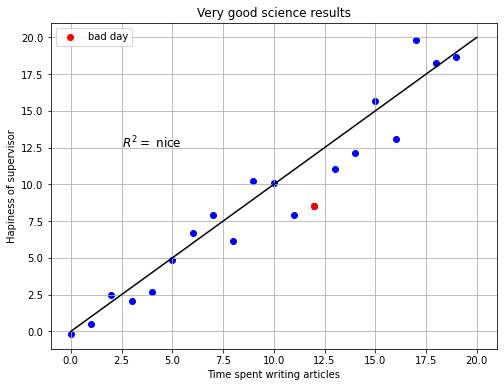

In [17]:
# Data for example plot
x_data = np.arange(20)
random1 = np.random.rand(20)
random2 = np.random.rand(20)
y_data = np.arange(20) + 4*random1 - 4*random2

# Creating a figure
plt.figure(figsize=(8,6))

# Scattering points to visualise trends
plt.scatter(x_data, y_data, color='b')

# Scattering the outlier
outlier_index = np.argmax(np.abs(random1 - random2))
if random1[outlier_index] > random2[outlier_index]:
    label='good day'
    color='g'
elif random1[outlier_index] < random2[outlier_index]:
    label='bad day'
    color='r'
plt.scatter(x_data[outlier_index], y_data[outlier_index], color=color, label=label )

# Adding a trend line
plt.plot([0,20],[0,20], c='k')

# Adding annotations
plt.title('Very good science results')
plt.xlabel('Time spent writing articles')
plt.ylabel('Hapiness of supervisor')
plt.annotate(r'$R^2=$ nice', (2.5, 12.5), fontsize=12)
plt.legend()
plt.grid('on')

# Showing the plot inline in a jupyter notebook
plt.show()

## Observing phenomenons trough data

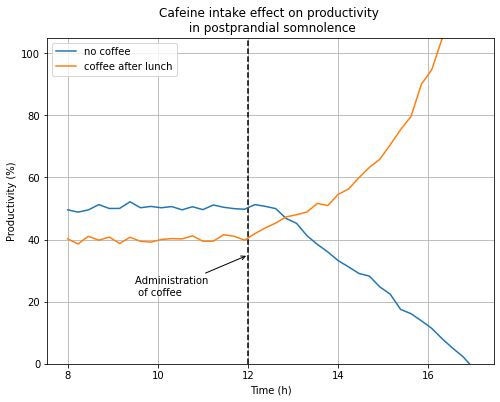

In [19]:
# Creating data
n = 40
time = np.linspace(8, 17, n) # hrs
productivity_1 = np.hstack([np.ones(n//2)*50, 50*np.linspace(1, 0, n//2)]) + np.random.randn(n)
productivity_2 = np.hstack([np.ones(n//2-1)*40, 100*np.exp(np.linspace(-3, 0, n//2+1))+40]) + np.random.randn(n)

# Creating a figure
plt.figure(figsize=(8,6))

# Plotting continuous curves
plt.plot(time, productivity_1, label='no coffee')
plt.plot(time, productivity_2, label='coffee after lunch')

# Plotting a vertical line
plt.vlines(12, 0, 105, color='k',linestyle='dashed')

# Adding an arrow with an annotation
plt.annotate("Administration \n of coffee", xy=(12, 35), xytext=(9.5, 22), arrowprops=dict(arrowstyle="->"))

plt.ylim(0,105)
plt.xlabel('Time (h)')
plt.ylabel('Productivity (%)')
plt.title('Cafeine intake effect on productivity \n in postprandial somnolence')
plt.legend()
plt.grid('on')
plt.show()

# 2. From 2D plots to animations

## But everything is more fun when animated

In [20]:
Video('coffee.mp4')

## Creating an animation using `animation.ArtistAnimation` 

The animation is created from a list of `Artist` which are plot objects that change at every frame

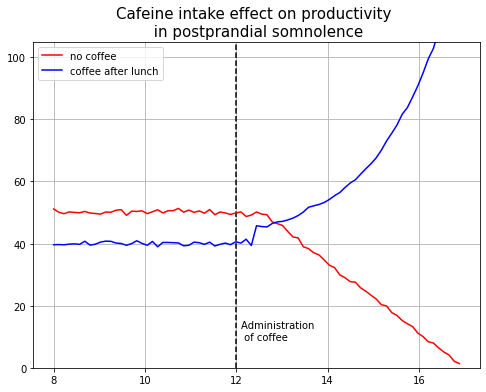

In [9]:
# Creating data
n = 80
time = np.linspace(8, 17, n) # hrs
productivity_1 = np.hstack([np.ones(n//2)*50, 50*np.linspace(1, 0, n//2)]) + 0.5*np.random.randn(n)
productivity_2 = np.hstack([np.ones(n//2-1)*40, 100*np.exp(np.linspace(-3, 0, n//2+1))+40]) + 0.5*np.random.randn(n)

# Creating the figure and the annotations
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Cafeine intake effect on productivity \n in postprandial somnolence', fontsize=15)
ax.annotate("Administration \n of coffee", (12.1, 9))
ax.vlines(12, 0, 105, color='k',linestyle='dashed')
ax.set_ylim(0,105)
ax.grid('on')

# Plotting the first point
artist1 = plt.plot(time[0], productivity_1[0], color='r', label='no coffee')
artist2 = plt.plot(time[0], productivity_2[0], color='b', label='coffee after lunch')
ax.legend()

# Creating the artists
# A list of everything that changes in the plot at every frame of the iteration
artists = []
for i, _ in enumerate(time):
    # Here we add one point to the line at every frame until the whole array is added
    artist1 = plt.plot(time[:i], productivity_1[:i], color='r', label='no coffee')[0]
    artist2 = plt.plot(time[:i], productivity_2[:i], color='b', label='coffee after lunch')[0]
    artists.append([artist1, artist2])

# Creating and saving the animation
# interval is in miliseconds
ani = animation.ArtistAnimation(fig, artists, interval=100)
ani.save('coffee.mp4', dpi=70) # dpi is the number of pixels per inches

**artist animations are convivial and somewhat easier to do, but they get heavy quick with larger datasets.**

## Creating an animation using `animation.FuncAnimation`

In [21]:
Video('scatter.mp4')

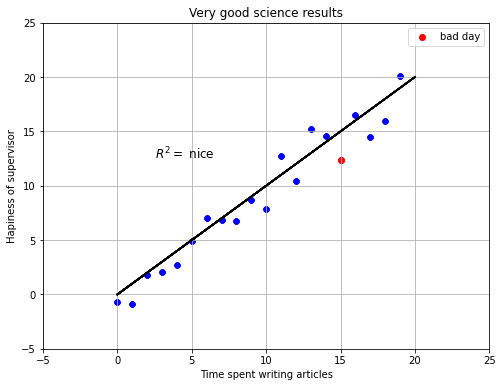

In [87]:
# Data for example plot
x_data = np.arange(20)
random1 = np.random.rand(20)
random2 = np.random.rand(20)
y_data = np.arange(20) + 4*random1 - 4*random2 
outlier_index = np.argmax(np.abs(4*random1 - 4*random2)) # The point furthest from the average

# Creating a figure
fig = plt.figure(figsize=(8,6))

# Adding annotations and adjustments before animating
plt.title('Very good science results')
plt.xlabel('Time spent writing articles')
plt.ylabel('Hapiness of supervisor')
plt.grid('on')
plt.xlim(-5,25)
plt.ylim(-5,25)

# Vectors for animation
dot_size = np.linspace(1, 30, 10)
x_line = np.linspace(0, 20, 10)
y_line = np.linspace(0, 20, 10)

def animate(i, x, y, line_x, line_y, outlier, dot_size):
    """
    You need to build this function to add what you want to your plot at the frame i
    You can supply any other variable
    """
    ax = plt.gca() # Use object oriented API
    
    # Secondary indexes to do something after the other parts
    k = i - len(x)*len(dot_size) + 1
    j = i - len(x)*len(dot_size) - len(line_x)
    
    # Condition to use the first index
    if i//len(dot_size) < (len(x)):
        # This adds the scatter points by increasing their marker_size parameter
        ax.scatter(x[i//len(dot_size)], y[i//len(dot_size)], dot_size[i%len(dot_size)], color='b')
    
    # Condition to use the second index
    elif k > 0 & k < len(line_x):
        # This plots the trend line from the line_x/line_y arrays
        ax.plot(line_x[:k], line_y[:k], color='k')
    
    # This adds annotations at the end of the animation
    if j == 0:
        if outlier[0] < outlier[1]:
            label='good day'
            color='g'
        elif outlier[0] > outlier[1]:
            label='bad day'
            color='r'
        ax.scatter(*outlier, color=color, label=label )
    elif j == 10: # skip 9 frames for a small delay
        ax.legend()
        plt.annotate(r'$R^2=$ nice', (2.5, 12.5), fontsize=12)
    
# The animation is created by instanciating the FuncAnimation class with the figure, the created function,
# its arguments. the interval is in miliseconds, the save_count parameter indicate the number of call needed
# to the animate function (for each i)
ani = animation.FuncAnimation(fig, animate, fargs=(x_data, y_data, x_line, y_line, (x_data[outlier_index],
                                                                    y_data[outlier_index]), dot_size),
                              interval=20, save_count=len(x_data)*len(dot_size) + len(x_line) + 11)

ani.save('scatter.mp4')

## Animating Tensile Test results with `animation.FuncAnimation`

In [22]:
Video('Tensile.mp4')

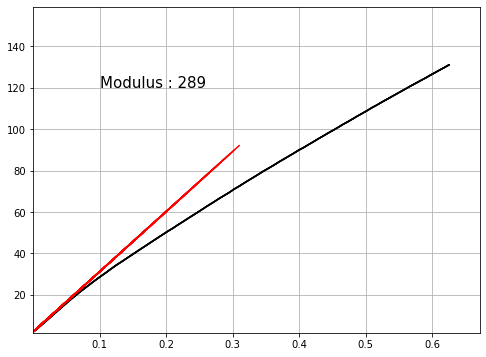

In [188]:
# Import the results
filenames = ['Traction/0_' + str(n) + '.txt' for n in range(1,5)]
dfs = []
for file in filenames:
    df = pd.read_csv(file, delim_whitespace=True, skiprows=5, engine='python')
    df = df.drop(0)  # remove the units
    df = df.astype(float) # make all numbers float
    dfs.append(df)

# Vectors for the animation

# One in every 20 points of the data from 0 to the maximum stress value
# Plotting a long array in an animation takes a lot of time so we reduce the size of the data
stresses = [df['Stress'][:np.argmax(df['Stress']):10]*scale for df, scale in zip(dfs, np.linspace(0.6, 1, 4))]
strains = [df['Extensometer'][:np.argmax(df['Stress']):10] for df in dfs]

# Ensure all the curve have the same number of samples
min_index = min([stress.shape[0] for stress in stresses])
stresses = [stress[:min_index] for stress in stresses]
strains = [strain[:min_index] for strain in strains]

# Creating the figure
fig = plt.figure(figsize=(8,6))
plt.xlim(np.hstack(strains).min(), np.hstack(strains).max())
plt.ylim(np.hstack(stresses).min(), np.hstack(stresses).max())
plt.grid('on')

def animate(i, stresses, strains):
    
    def remove_annotations():
        # A function to remove all annotations from the plot
        for child in plt.gca().get_children():
            if isinstance(child, matplotlib.text.Annotation):
                child.remove()
                
    def remove_lines():
        ax = plt.gca()
        ax.lines[:] = []
                
    # mean stress-strain curve
    average_stress = np.vstack(stresses).mean(axis=0)
    average_strain = np.vstack(strains).mean(axis=0)
    
    # curves between the samples and the mean curve
    transition_stresses = [np.linspace(stress, average_stress, len(average_stress)) for stress in stresses]
    transition_strains = [np.linspace(strain, average_strain, len(average_stress)) for strain in strains]
    
    # Color transition
    black = (0, 0, 0)
    grey = (0.7, 0.7, 0.7)
    colors = np.linspace(grey, black, len(average_stress))
    
    # Young modulus
    D_sigma =  np.array([average_stress[i] - average_stress[i+1] for i in range(len(average_stress)-1)])
    D_strain =  np.array([average_strain[i] - average_strain[i+1] for i in range(len(average_strain)-1)])
    E = D_sigma / D_strain
    
    
    # Defined indexes
    j, k, l, m, n = [i - n*len(stresses[0]) for n in range(1, len(stresses) + 2)]
    
    # Plotting the first curve
    if i < len(stresses[0]):
        # Add an annotation
        if i == 0:
            plt.annotate('Sample 1', (0.1, 120), fontsize=15)

        plt.plot(strains[0][:i], stresses[0][:i], color=grey)
    
    # Plot the second curve
    if ((j > 0) & (j < (len(average_stress)))):
        if j == 1:
            remove_annotations()
            plt.annotate('Sample 2', (0.1, 120), fontsize=15)
        plt.plot(strains[1][:j], stresses[1][:j], color=grey)
    
    # Plot the third curve
    if ((k > 0) & (k < (len(average_stress)))):
        if k == 1:
            remove_annotations()
            plt.annotate('Sample 3', (0.1, 120), fontsize=15)

        plt.plot(strains[2][:k], stresses[2][:k], color=grey)
    
    # Plot the fourth curve
    if ((l > 0) & (l < (len(average_stress)))):
        if l == 1:
            remove_annotations()
            plt.annotate('Sample 4', (0.1, 120), fontsize=15)
        plt.plot(strains[3][:l], stresses[3][:l], color=grey)
    
    # Plot the transition to the average
    if ((m >= 0) & (m < (len(average_stress)))):
        if m == 0:
            remove_annotations()
            plt.annotate('Averaging', (0.1, 120), fontsize=15)
        remove_lines()
        for transition_strain, transition_stress in zip(transition_strains, transition_stresses):
            plt.plot(transition_strain[m], transition_stress[m], c=colors[m])
    
    # Plot the young modulus
    if ((n > 0) & (n < len(average_stress)//2)):
        if n == 1:
            remove_annotations()
            plt.annotate('Modulus : ' + str(int(E[3])), (0.1, 120), fontsize=15)
            
        plt.plot(average_strain[:n], average_strain[:n]*E[3] + average_stress[0], c='r')
        
ani = animation.FuncAnimation(fig, animate, fargs = (stresses, strains), save_count = 6*stresses[0].shape[0])

writer = animation.writers['ffmpeg'](fps=30) # for lightning saving speed
ani.save('Tensile.mp4', writer=writer)

## Animating FEM modal analysis results with `animation.ArtistAnimation`

In [23]:
Video('Modal.mp4')

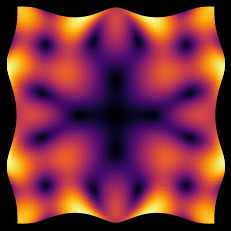

In [2]:
# Importing the saved arrays
mesh_coords = np.load('Modal/mesh_coord.npy')
eigen_vector = np.load('Modal/vector.npy')

# Creating a mesh grid for the 2D plot
x, y = mesh_coords.transpose()
x = np.unique(x)
y = np.unique(y)
X, Y = np.meshgrid(x, y)

# Mapping the vector displacement on the mesh
nodes = int(np.sqrt(len(mesh_coords))) # square mesh
Ux = np.flip(eigen_vector[0:eigen_vector.shape[0]:2].reshape(nodes, nodes), axis=0)
Uy = np.flip(eigen_vector[1:eigen_vector.shape[0]:2].reshape(nodes, nodes), axis=0)
Ut = np.sqrt(Ux ** 2 + Uy ** 2)

# Creating a list of vectors to animate the displacement
Uxs = np.append(np.linspace(-Ux, Ux, 20), np.linspace(Ux, -Ux, 20), axis=0)
Uys = np.append(np.linspace(-Uy, Uy, 20), np.linspace(Uy, -Uy, 20), axis=0)
Uts = np.abs(np.append(np.linspace(-Ut, Ut, 20), np.linspace(Ut, -Ut, 20), axis=0))

# Creating the figure
fig, ax = plt.subplots()
fig.set_facecolor("k") # make the figure black so it looks cooler
ax.set_axis_off()
ax.set_aspect('equal')

scale = 40 # scale factor for the displacement
ims = [] # list of artists
for _ in range(3): # animate the displacement three times
    for dx, dy, dt in zip(Uxs, Uys, Uts):
        im = ax.pcolormesh(X + dx * scale, Y + dy * scale, dt, cmap='inferno', shading = 'gouraud')
        ims.append([im])
        
# Animate the artists
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True)

writer = animation.writers['ffmpeg'](fps=20) # for lightning fast saving speed
ani.save('Modal.mp4', writer=writer)

## A gallery of other animations

In [4]:
Video('Gallery/4modes.mp4')

In [5]:
Video('Gallery/Michel.mp4')

In [6]:
Video('Gallery/TOPOPT_3D.mp4')

## Going further

For the source code : [git hub](https://github.com/olivecha/LIPEC_Matplotlib)